In [ ]:
!pip install ucimlrepo
!pip install matplotlib
!pip install scipy
!pip install seaborn
!pip install statsmodels

In [ ]:
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import t, chi2
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [1]:
print("Zbiór danych: Abalone Data Set (UCI Machine Learning Repository)")
print("Źródło: https://archive.ics.uci.edu/ml/datasets/abalone")


Zbiór danych: Abalone Data Set (UCI Machine Learning Repository)
Źródło: https://archive.ics.uci.edu/ml/datasets/abalone


## Opis danych
Zbiór danych: Abalone Data Set (UCI Machine Learning Repository)
Źródło: https://archive.ics.uci.edu/ml/datasets/abalone

Zbiór danych agreguje cechy związane z biologią suchotek. Cechy mogą być wykorzystane do np. przewidywania wieku zwięrzęcia.
Zbiór danych zawiera 4177 rekordów.

Na stronie ze źródłem danych można przeczytać, że z oryginalnych danych usunięto przykłady z brakującymi wartościami, a zakresy wartości ciągłych zostały przeskalowane poprzez podzielenie przez 200.

In [41]:
abalone = fetch_ucirepo(id=1) 

X = abalone.data.features 
y = abalone.data.targets
df = X
df['Rings'] = y

### Tabelaryczna reprezentacja danych

In [6]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Opis cech

| Nazwa zmiennej     | Typ         | Opis                                 | Jednostki |
|--------------------|-------------|--------------------------------------|-----------|
| Płeć               | Kategoryczna| M, F i I (niemowlę)                  |           |
| Długość            | Ciągła      | Najdłuższy wymiar muszli             | mm        |
| Średnica           | Ciągła      | Prostopadle do długości              | mm        |
| Wysokość           | Ciągła      | Z mięsem w muszli                    | mm        |
| Masa_całkowita     | Ciągła      | Cała suchotka                        | gramy     |
| Masa_mięsa         | Ciągła      | Masa samego mięsa                    | gramy     |
| Masa_wnętrzności   | Ciągła      | Masa wnętrzności         | gramy     |
| Masa_muszli        | Ciągła      | Po wysuszeniu                        | gramy     |
| Pierścienie        | Liczba całkowita | +1.5 daje wiek w latach         |           |


### Histogramy cech numerycznych

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole_weight'}>,
        <Axes: title={'center': 'Shucked_weight'}>,
        <Axes: title={'center': 'Viscera_weight'}>],
       [<Axes: title={'center': 'Shell_weight'}>,
        <Axes: title={'center': 'Rings'}>, <Axes: >]], dtype=object)

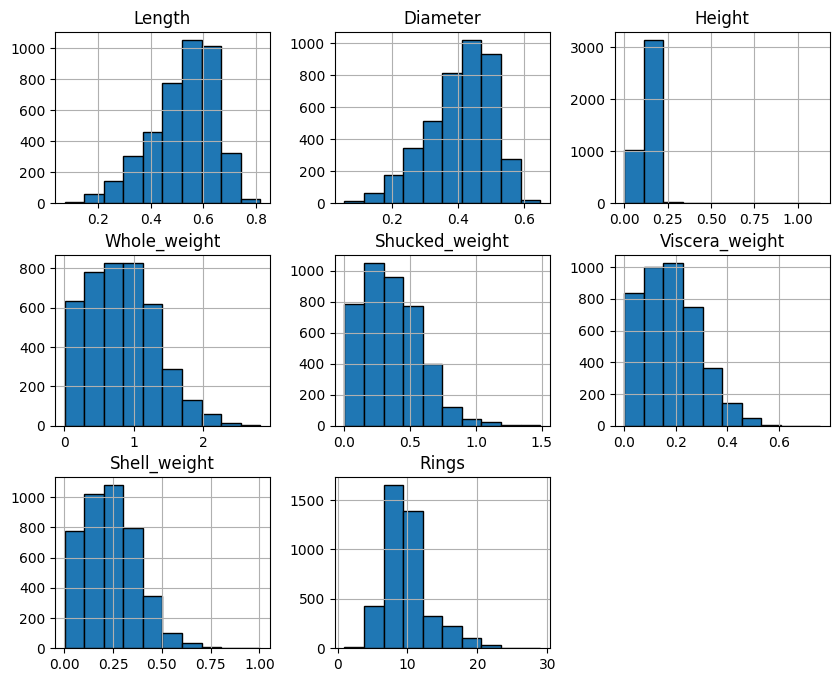

In [42]:
numeric_columns = ["Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight", 'Rings']
df[numeric_columns].hist(figsize=(10, 8), bins=10, edgecolor='black')

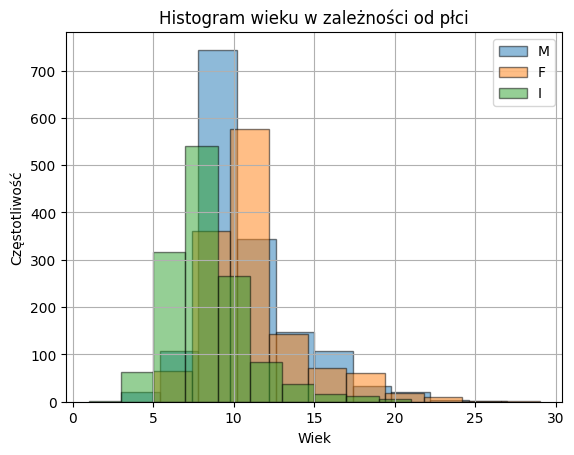

In [82]:
fig, ax = plt.subplots()
for sex in df["Sex"].unique():
    df[df["Sex"] == sex]["Rings"].hist(alpha=0.5, bins=10, label=sex, edgecolor='black')

plt.xlabel("Wiek")
plt.ylabel("Częstotliwość")
plt.title("Histogram wieku w zależności od płci")
plt.legend()
plt.show()

## Estymacja parametrów rozkładu (punktowa)

- średnia
- odchylenie standardowe
- odchylenie przeciętne
- mediana
- moda
- wariancja
- kurtoza
- skośność
- IQR
- kwantyle (25, 75)

In [ ]:
desc = df[numeric_columns].describe().T
desc['mad'] = df[numeric_columns].apply(lambda x: np.mean(np.abs(x - np.mean(x))))
desc['mode'] = df[numeric_columns].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
desc['skew'] = df[numeric_columns].skew()
desc['var'] = df[numeric_columns].var()
desc['kurtosis'] = df[numeric_columns].kurtosis()
desc['iqr'] = df[numeric_columns].apply(stats.iqr)
desc['q25'] = df[numeric_columns].quantile(0.25)
desc['q75'] = df[numeric_columns].quantile(0.75)

desc[['mean','std','mad','50%','mode','var','kurtosis','skew','iqr','q25','q75']]


,mean,std,mad,50%,mode,var,kurtosis,skew,iqr,q25,q75
Length,0.523992,0.120093,0.096678,0.5450,0.5500,0.014422,0.064621,-0.639873,0.1650,0.4500,0.615
Diameter,0.407881,0.099240,0.080296,0.4250,0.4500,0.009849,-0.045476,-0.609198,0.1300,0.3500,0.480
Height,0.139516,0.041827,0.031285,0.1400,0.1500,0.001750,76.025509,3.128817,0.0500,0.1150,0.165
Whole_weight,0.828742,0.490389,0.400454,0.7995,0.2225,0.240481,-0.023644,0.530959,0.7115,0.4415,1.153
Shucked_weight,0.359367,0.221963,0.179455,0.3360,0.1750,0.049268,0.595124,0.719098,0.3160,0.1860,0.502
Viscera_weight,0.180594,0.109614,0.089252,0.1710,0.1715,0.012015,0.084012,0.591852,0.1595,0.0935,0.253
Shell_weight,0.238831,0.139203,0.112415,0.2340,0.2750,0.019377,0.531926,0.620927,0.1990,0.1300,0.329
Rings,9.933684,3.224169,2.362462,9.0000,9.0000,10.395266,2.330687,1.114102,3.0000,8.0000,11.000


## Estymacja parametrów (przedziałowa)

Realizacja przedziałów ufności dla wariancji i dla średniej na poziomie istotności 0.05
- Przedziały ufności metodą parametryczną dla wariancji i dla średniej
- Porównanie średniej z metodą bootstrap

In [ ]:
alpha = 0.05
n_boot = 10000
results = []

for col in numeric_columns:
    x = df[col]
    n = len(x)
    mean = x.mean()
    std = x.std(ddof=1)
    var = x.var(ddof=1)
    
    # Średnia (parametryczna)
    t_crit = t.ppf(1 - alpha/2, n-1)
    ci_mean = (mean - t_crit * std / np.sqrt(n), mean + t_crit * std / np.sqrt(n))

    # Wariancja (parametryczna)
    chi2_lower = chi2.ppf(alpha/2, n-1)
    chi2_upper = chi2.ppf(1-alpha/2, n-1)
    ci_var = ((n-1)*var/chi2_upper, (n-1)*var/chi2_lower)
    
    # Bootstrap
    boot_means = np.random.choice(x, (n_boot, n)).mean(axis=1)
    ci_bootstrap = np.percentile(boot_means, [100 * alpha / 2, 100 * (1 - alpha / 2)])

    results.append({
        "Cecha": col,
        "Średnia": np.round(mean, 4),
        "Przedział_średnia": np.round(ci_mean, 4),
        "Przedział_średnia_bootstrap": np.round(ci_bootstrap, 4),
        "Wariancja": np.round(var, 4),
        "Przedział_wariancja": np.round(ci_var, 4)
    })

ci_df = pd.DataFrame(results)
ci_df

,Cecha,Średnia,Przedział_średnia,Przedział_średnia_bootstrap,Wariancja,Przedział_wariancja
0,Length,0.5240,"[0.5203, 0.5276]","[0.5204, 0.5276]",0.0144,"[0.0138, 0.0151]"
1,Diameter,0.4079,"[0.4049, 0.4109]","[0.4048, 0.4109]",0.0098,"[0.0094, 0.0103]"
2,Height,0.1395,"[0.1382, 0.1408]","[0.1383, 0.1408]",0.0017,"[0.0017, 0.0018]"
3,Whole_weight,0.8287,"[0.8139, 0.8436]","[0.8136, 0.8434]",0.2405,"[0.2305, 0.2511]"
4,Shucked_weight,0.3594,"[0.3526, 0.3661]","[0.3526, 0.3662]",0.0493,"[0.0472, 0.0515]"
5,Viscera_weight,0.1806,"[0.1773, 0.1839]","[0.1773, 0.1839]",0.0120,"[0.0115, 0.0125]"
6,Shell_weight,0.2388,"[0.2346, 0.2431]","[0.2346, 0.2431]",0.0194,"[0.0186, 0.0202]"
7,Rings,9.9337,"[9.8359, 10.0315]","[9.8353, 10.0304]",10.3953,"[9.9634, 10.856]"


### Wnioski:
- Przedziały wyznaczone metodą parametryczną i bootstrap są do siebie bardzo zbliżone

## Wizualizacja danych na wykresach

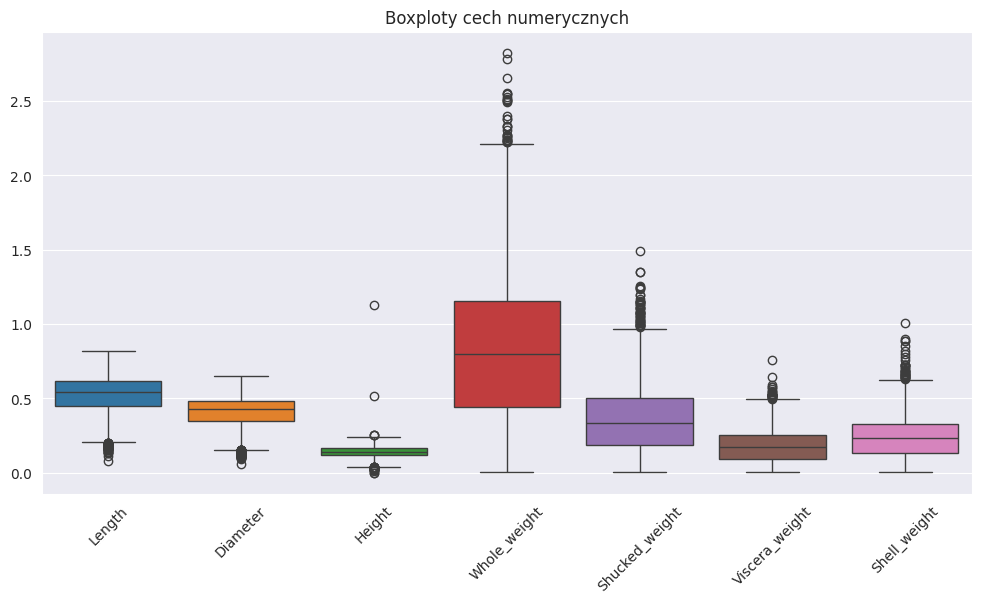

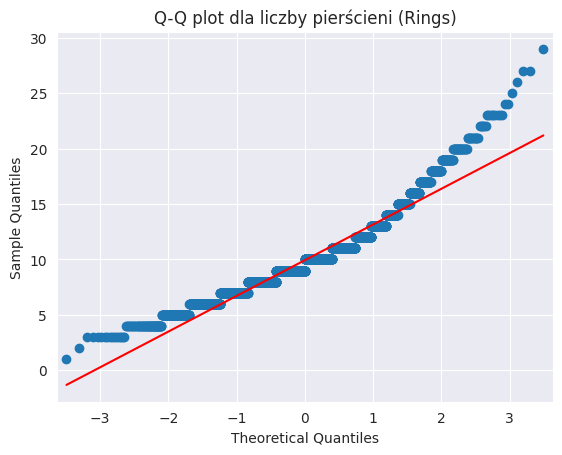

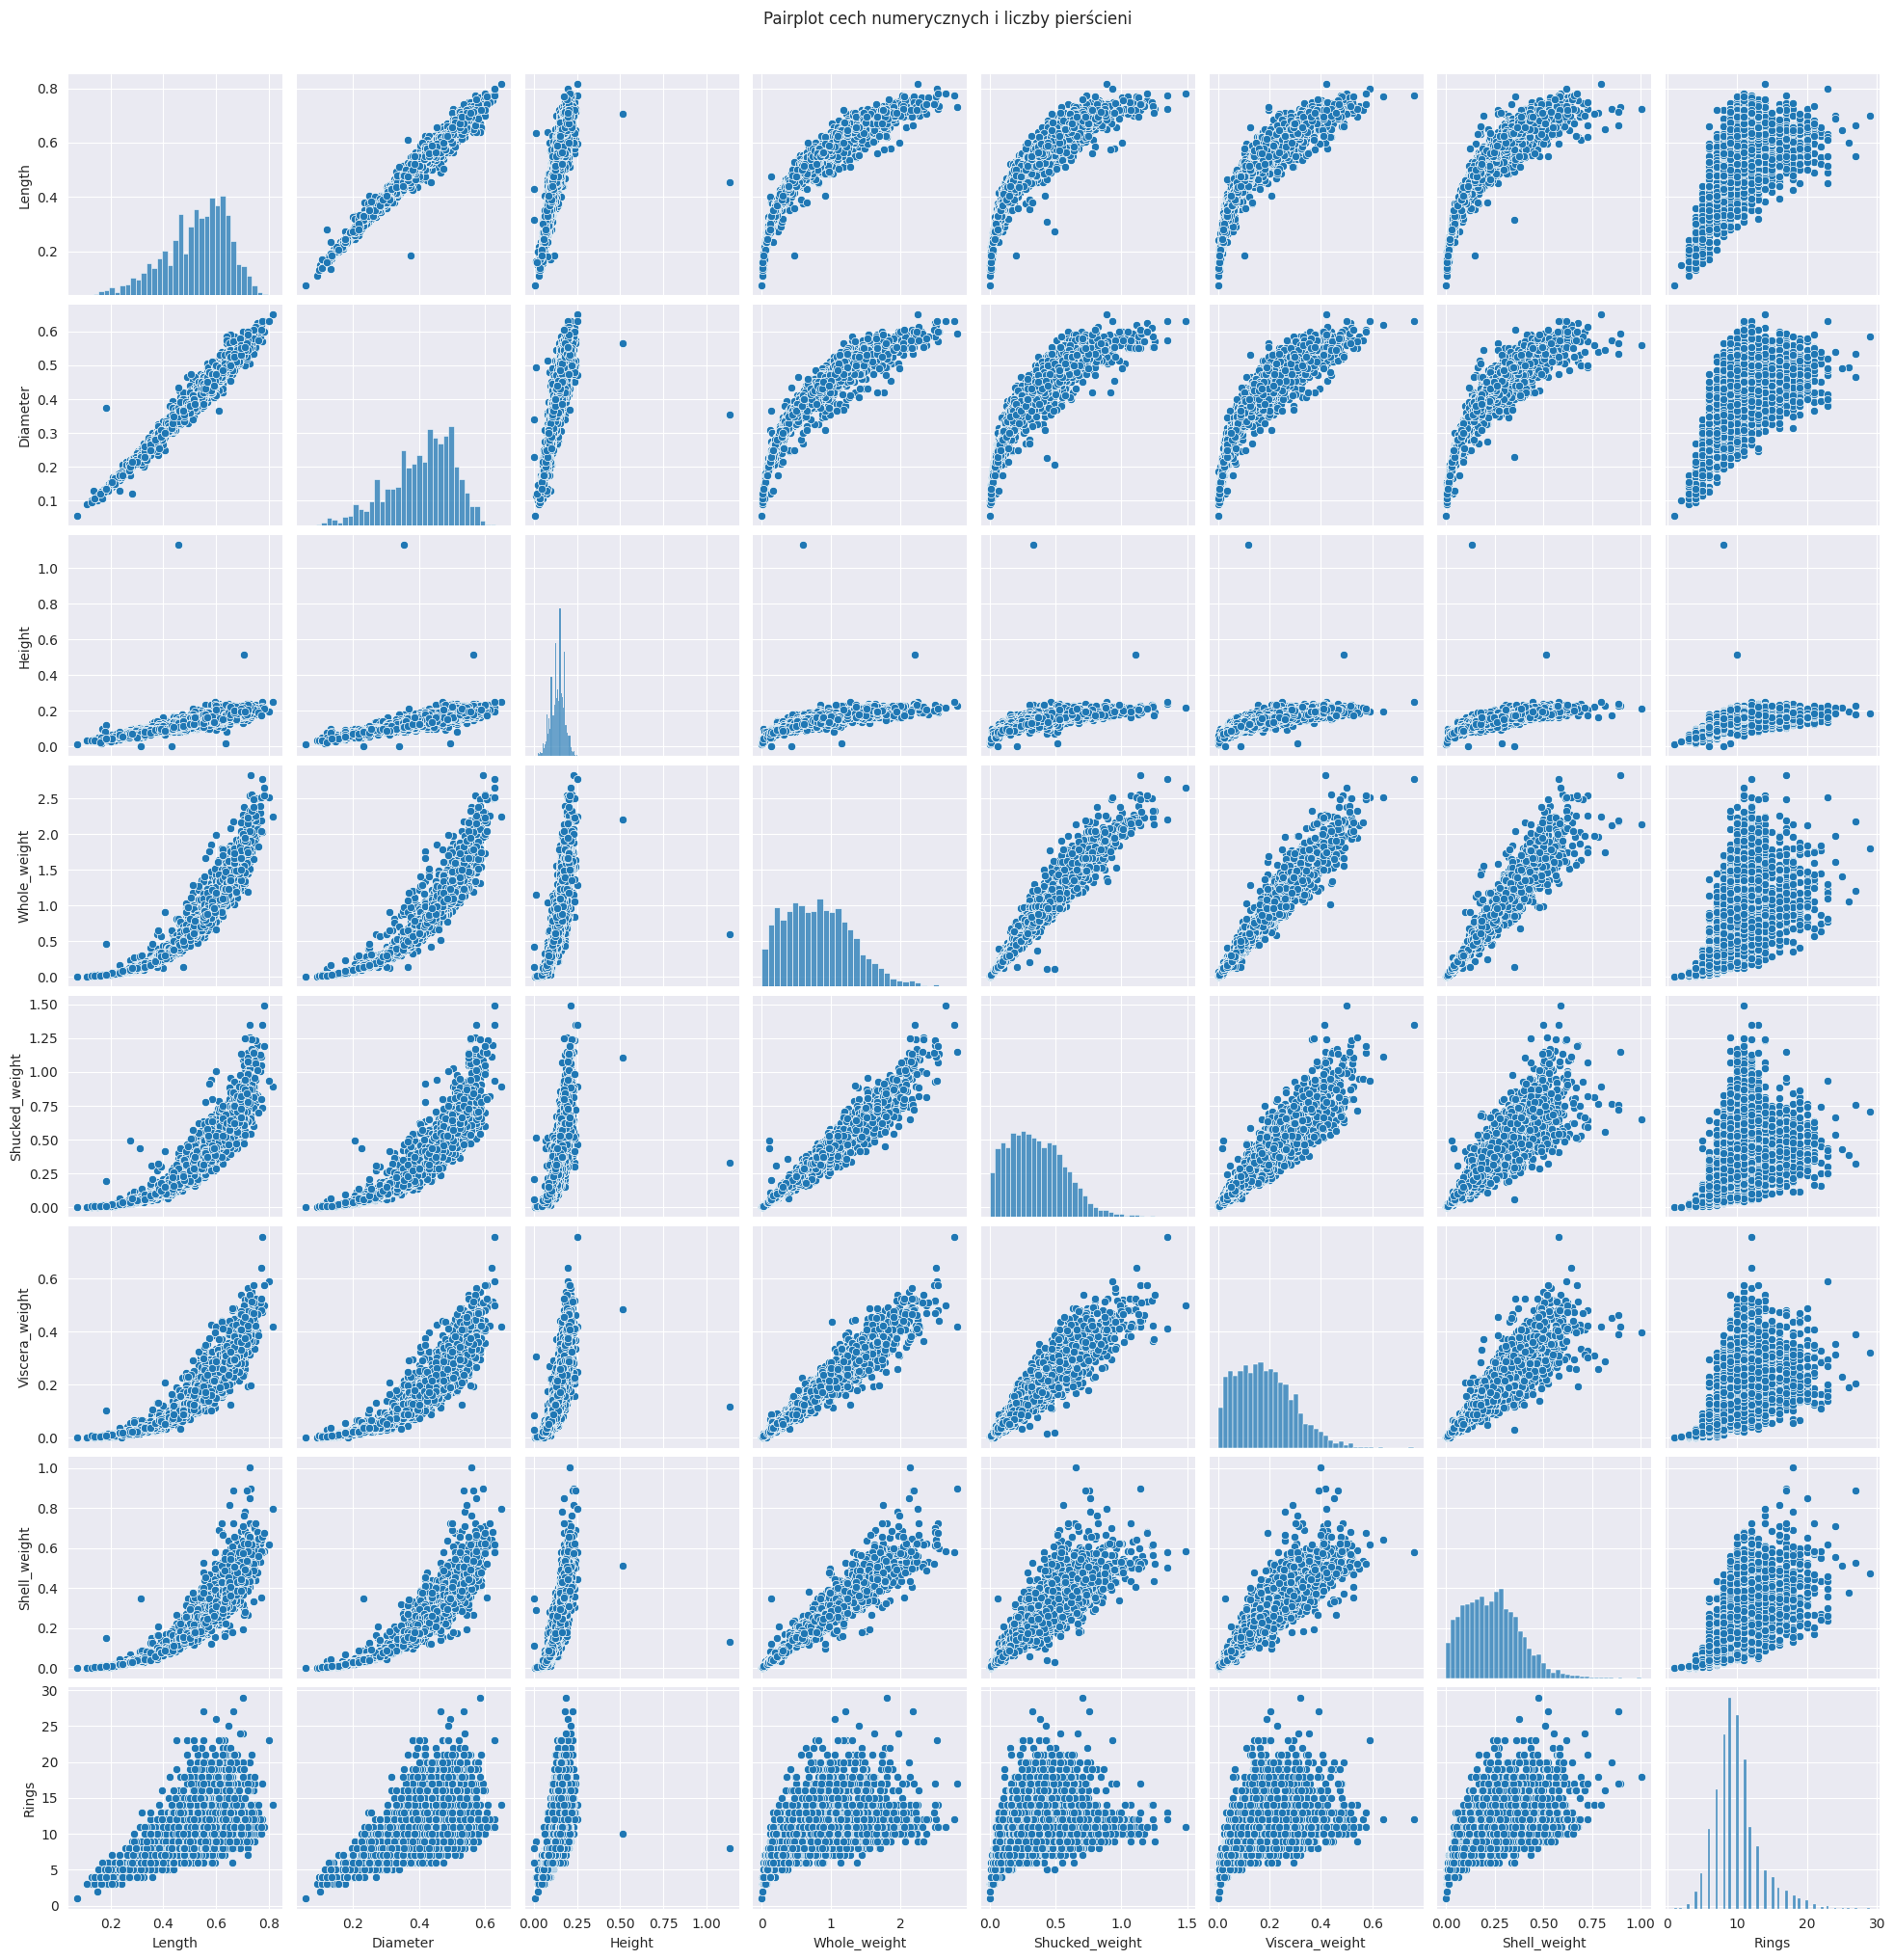

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns])
plt.title("Boxploty cech numerycznych")
plt.xticks(rotation=45)
plt.show()

sm.qqplot(df['Rings'], line='s')
plt.title("Q-Q plot dla liczby pierścieni (Rings)")
plt.show()

sns.pairplot(df[numeric_columns + ['Rings']])
plt.suptitle("Pairplot cech numerycznych i liczby pierścieni", y=1.02)
plt.show()

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 4, i+1)
    sns.violinplot(x=df['Sex'], y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_columns + ['Rings']].corr(), annot=True, cmap='coolwarm')
plt.title("Macierz korelacji")
plt.show()

## Testy normalności rozkładów

Alfa przyjęto jako 0.05.

H_0 = Dane pochodzą z rozkładu normalnego

H_1 = Dane nie pochodzą z rozkładu normalnego

Przeprowadzone testy:
- D’Agostino-Pearsona
- Shapiro-Wilka
- Andersona-Darlinga

In [37]:
from scipy.stats import normaltest, shapiro, anderson

results = []
alpha = 0.05

for col in numeric_columns:
    x = df[col]

    # Test D’Agostino-Pearsona
    k2_stat, k2_p = normaltest(x)

    # Test Shapiro-Wilka
    shapiro_stat, shapiro_p = shapiro(x)

    # Test Andersona-Darlinga
    anderson_result = anderson(x)
    anderson_stat = anderson_result.statistic
    anderson_crit_val_5 = anderson_result.critical_values[2]

    # Zapisz wyniki
    results.append({
        "Cecha": col,
        "D'Agostino_stat": round(k2_stat, 4),
        "D'Agostino_p": round(k2_p, 4),
        "H0 orzucona D'Agostino": k2_p < alpha,
        "Shapiro_stat": round(shapiro_stat, 4),
        "Shapiro_p": round(shapiro_p, 4),
        "H0 orzuconaShapiro": shapiro_p < alpha,
        "Anderson_stat": round(anderson_stat, 4),
        "Anderson_crit": round(anderson_crit_val_5, 4),
        "H0 odrzucona Anderson": anderson_stat > anderson_crit_val_5
    })

normality_df = pd.DataFrame(results)
normality_df

,Cecha,D'Agostino_stat,D'Agostino_p,H0 orzucona D'Agostino,Shapiro_stat,Shapiro_p,H0 orzuconaShapiro,Anderson_stat,Anderson_crit,H0 odrzucona Anderson
0,Length,242.1589,0.0,True,0.9697,0.0,True,36.6212,0.786,True
1,Diameter,222.1306,0.0,True,0.9705,0.0,True,36.4378,0.786,True
2,Height,3528.1390,0.0,True,0.8896,0.0,True,14.4931,0.786,True
3,Whole_weight,174.2156,0.0,True,0.9723,0.0,True,20.9927,0.786,True
4,Shucked_weight,332.1407,0.0,True,0.9621,0.0,True,27.2292,0.786,True
5,Viscera_weight,212.1444,0.0,True,0.9681,0.0,True,25.7111,0.786,True
6,Shell_weight,261.1200,0.0,True,0.9704,0.0,True,18.5607,0.786,True
7,Rings,813.4492,0.0,True,0.9312,0.0,True,78.6001,0.786,True


## Testy statystyczne dla średniej i wariancji

In [76]:
from scipy.stats import ttest_1samp, chi2

stats_df = pd.DataFrame({
    'Feature': ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
    'Mean': np.round([0.52399, 0.407881, 0.139516, 0.828742, 0.359367, 0.180594, 0.238831, 9.933684], 2),
    'Var': np.round([0.014422, 0.009849, 0.001750, 0.240481, 0.049268, 0.012015, 0.019377, 10.395266], 2)
})

results = []
alpha = 0.05

for feature in numeric_columns:
    data = df[feature].dropna()
    n = len(data)
    sample_mean = data.mean()
    sample_var = data.var(ddof=1)

    mu_0 = stats_df.loc[stats_df['Feature'] == feature, 'Mean'].values[0]
    t_stat, t_p = ttest_1samp(data, popmean=mu_0)
    t_h0_reject = t_p < alpha

    sigma2_0 = stats_df.loc[stats_df['Feature'] == feature, 'Var'].values[0]
    chi2_stat = (n - 1) * sample_var / sigma2_0
    chi2_p = 2 * min(
        chi2.cdf(chi2_stat, df=n - 1),
        1 - chi2.cdf(chi2_stat, df=n - 1)
    )
    chi2_h0_reject = chi2_p < alpha

    results.append({
        'Feature': feature,
        'T_stat': t_stat,
        'T_p_value': t_p,
        'T_H0_reject': t_h0_reject,
        'Chi2_stat': chi2_stat,
        'Chi2_p_value': chi2_p,
        'Chi2_H0_reject': chi2_h0_reject
    })

results_df = pd.DataFrame(results)

# Zaokrąglenie do 4 miejsc po przecinku
results_df = results_df.round(4)
results_df

C:\Users\Adrian\AppData\Local\Temp\ipykernel_19712\1590721877.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  chi2_stat = (n - 1) * sample_var / sigma2_0


,Feature,T_stat,T_p_value,T_H0_reject,Chi2_stat,Chi2_p_value,Chi2_H0_reject
0,Length,2.1484,0.0317,True,6022.7557,0.0000,True
1,Diameter,-1.3798,0.1677,False,4112.7549,0.4913,False
2,Height,-0.7472,0.4550,False,inf,0.0000,True
3,Whole_weight,-0.1658,0.8683,False,4184.3762,0.9212,False
4,Shucked_weight,-0.1842,0.8539,False,4114.8258,0.5058,False
5,Viscera_weight,0.3500,0.7264,False,5017.5825,0.0000,True
6,Shell_weight,-0.5428,0.5873,False,4045.9976,0.1526,False
7,Rings,0.0739,0.9411,False,4174.0991,0.9892,False


- Test ANOVA - sprawdzenie czy cechy płci M i F mają taką samą średnią 
- Test Levene - sprawdzenie czy cechy płci M i F mają taką samą wariancję

In [81]:
import pandas as pd
from scipy.stats import f_oneway, levene

numeric_cols = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
groups = df['Sex'].unique()
alpha = 0.05

results = []

for col in numeric_cols:
    grouped_data = [df[df['Sex'] == sex][col].dropna() for sex in ['M','F']]
    f_stat, p_anova = f_oneway(*grouped_data)

    w_stat, p_levene = levene(*grouped_data)

    results.append({
        'Feature': col,
        'ANOVA_F_stat': round(f_stat, 4),
        'ANOVA_p_value': round(p_anova, 4),
        'ANOVA_H0_reject': p_anova < alpha,
        'Levene_stat': round(w_stat, 4),
        'Levene_p_value': round(p_levene, 4),
        'Levene_H0_reject': p_levene < alpha
    })

results_df = pd.DataFrame(results)
results_df


,Feature,ANOVA_F_stat,ANOVA_p_value,ANOVA_H0_reject,Levene_stat,Levene_p_value,Levene_H0_reject
0,Length,24.2410,0.0000,True,15.4635,0.0001,True
1,Diameter,27.2808,0.0000,True,15.3122,0.0001,True
2,Height,22.2770,0.0000,True,4.3767,0.0365,True
3,Whole_weight,10.4364,0.0012,True,5.1200,0.0237,True
4,Shucked_weight,2.7450,0.0977,False,9.3724,0.0022,True
5,Viscera_weight,15.6455,0.0001,True,2.1645,0.1413,False
6,Shell_weight,17.1424,0.0000,True,1.4174,0.2339,False
7,Rings,13.4904,0.0002,True,0.7229,0.3953,False
